In [2]:
import keras

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
EPOCHS = 10
BATCH_SIZE = 64
OPTIMIZER = tf.keras.optimizers.Adam
OPTIMIZER_PARAMS = dict(learning_rate=0.001)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [5]:
(x_train, x_test) = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0

In [6]:
(y_train, y_test) = tf.keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test)

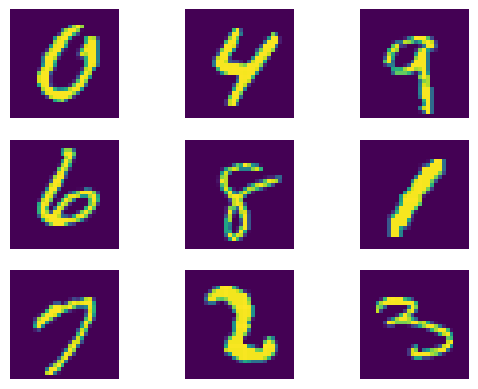

In [7]:
plt.figure()

for i in range(9):
    idx_img = np.random.randint(len(x_train))

    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(x_train[idx_img])

plt.show()

In [8]:
dnn_classifier = tf.keras.Sequential([ tf.keras.Input(shape=(28, 28, 1)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(512, activation='relu'),
                                       tf.keras.layers.Dense(256, activation='relu'),
                                       tf.keras.layers.Dense(124, activation='relu'),
                                       tf.keras.layers.Dense(10, activation='softmax') ])

dnn_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566366 (2.16 MB)
Trainable params: 566366 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
dnn_classifier.compile(loss=tf.keras.losses.categorical_crossentropy,
                       optimizer=OPTIMIZER(**OPTIMIZER_PARAMS),
                       metrics=[ 'accuracy' ])

In [10]:
dnn_classifier_history = dnn_classifier.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Epoch 1/10
938/938 [==============================] - 19s 17ms/step - loss: 0.2037 - accuracy: 0.9380
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0825 - accuracy: 0.9751
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0575 - accuracy: 0.9816
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0440 - accuracy: 0.9859
Epoch 5/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0337 - accuracy: 0.9893
Epoch 6/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 8/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 9/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 10/10
938/938 [==============================] - 10s 10ms/step - loss: 0.019

In [11]:
dnn_classifier_score = dnn_classifier.evaluate(x_test, y_test)

print(f"Test Acuraccy: {dnn_classifier_score[1]}", f"Test Loss: {dnn_classifier_score[0]}", sep='\n')

313/313 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9818
Test Acuraccy: 0.9818000197410583
Test Loss: 0.078276127576828


In [12]:
cnn_classifier = tf.keras.Sequential([ tf.keras.Input(shape=(28, 28, 1)),
                                       tf.keras.layers.Conv2D(filters=32,
                                                              kernel_size=5,
                                                              strides=(1, 1),
                                                              padding='same',
                                                              activation=tf.nn.relu),
                                       tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                                                 strides=(1, 1),
                                                                 padding='valid'),
                                       tf.keras.layers.Conv2D(filters=64,
                                                              kernel_size=3,
                                                              strides=(1, 1),
                                                              padding='same',
                                                              activation=tf.nn.relu),
                                       tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                                                 strides=(2, 2),
                                                                 padding='valid'),
                                       tf.keras.layers.Dropout(0.25),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(128, activation='relu'),
                                       tf.keras.layers.Dropout(0.5),
                                       tf.keras.layers.Dense(10, activation='softmax') ])

cnn_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)            

In [13]:
cnn_classifier.compile(loss=tf.keras.losses.categorical_crossentropy,
                       optimizer=OPTIMIZER(**OPTIMIZER_PARAMS),
                       metrics=[ 'accuracy' ])

In [14]:
cnn_classifier_history = cnn_classifier.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Epoch 1/10
938/938 [==============================] - 231s 246ms/step - loss: 0.1818 - accuracy: 0.9457
Epoch 2/10
938/938 [==============================] - 224s 239ms/step - loss: 0.0731 - accuracy: 0.9778
Epoch 3/10
938/938 [==============================] - 232s 247ms/step - loss: 0.0560 - accuracy: 0.9829
Epoch 4/10
938/938 [==============================] - 223s 238ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 5/10
938/938 [==============================] - 228s 244ms/step - loss: 0.0392 - accuracy: 0.9876
Epoch 6/10
938/938 [==============================] - 225s 240ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 7/10
938/938 [==============================] - 227s 242ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 8/10
938/938 [==============================] - 223s 238ms/step - loss: 0.0296 - accuracy: 0.9908
Epoch 9/10
938/938 [==============================] - 227s 242ms/step - loss: 0.0231 - accuracy: 0.9925
Epoch 10/10
938/938 [==============================] - 222s 237m

In [15]:
cnn_classifier_score = cnn_classifier.evaluate(x_test, y_test)

print(f"Test Acuraccy: {cnn_classifier_score[1]}", f"Test Loss: {cnn_classifier_score[0]}", sep='\n')

313/313 [==============================] - 14s 44ms/step - loss: 0.0254 - accuracy: 0.9928
Test Acuraccy: 0.9927999973297119
Test Loss: 0.02538095973432064


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

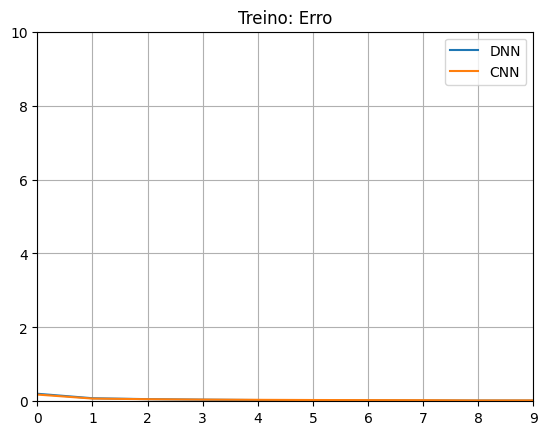

In [16]:
plt.figure()

plt.title('Treino: Erro')

plt.plot(dnn_classifier_history.history['loss'], label='DNN')
plt.plot(cnn_classifier_history.history['loss'], label='CNN')

plt.legend()
plt.grid()

plt.ylim(ymin=0, ymax=10)
plt.xlim(xmin=0, xmax=EPOCHS - 1)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

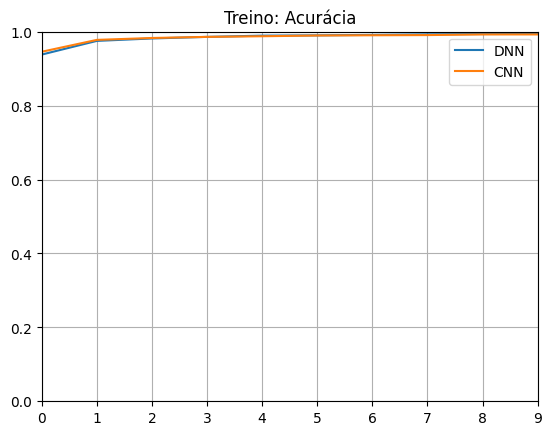

In [17]:
plt.figure()

plt.title('Treino: Acurácia')

plt.plot(dnn_classifier_history.history['accuracy'], label='DNN')
plt.plot(cnn_classifier_history.history['accuracy'], label='CNN')

plt.legend()
plt.grid()

plt.ylim(ymin=0.0, ymax=1)
plt.xlim(xmin=0, xmax=EPOCHS - 1)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

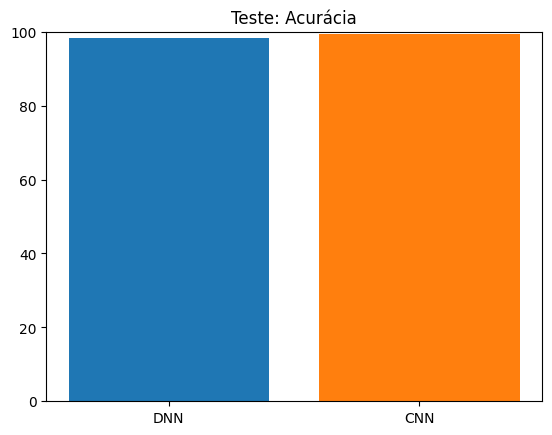

In [18]:
plt.figure()

plt.title('Teste: Acurácia')

plt.bar(x='DNN', height=dnn_classifier_score[1] * 100)
plt.bar(x='CNN', height=cnn_classifier_score[1] * 100)

plt.ylim(ymin=0, ymax=100)

plt.show()